In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.sqlite import SqliteSaver
from langchain.chat_models import init_chat_model


from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv
from langchain.schema import AIMessage, HumanMessage
from typing import TypedDict, Annotated
import os
import sqlite3  # Python's built-in SQLite module


In [2]:
load_dotenv()

True

In [ ]:


model = HuggingFaceEndpoint(
    # repo_id="HuggingFaceH4/zephyr-7b-beta",
    repo_id="openai/gpt-oss-120b",
    task="text-generation",
    huggingfacehub_api_token=os.getenv("HUGGINGFACEHUB_ACCESS_TOKEN")
)
model = ChatHuggingFace(llm=llm)



d:\Ai Projects\gen ai\16.-Chatbot\newvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = init_chat_model("google_genai:gemini-2.0-flash")


In [3]:
class State(TypedDict):
    message: Annotated[list[str],add_messages]

In [4]:
def chating(state: State)->State:
    result = model.invoke(state['message'])
    
    return {'message':AIMessage(result.content)}


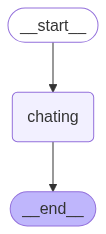

In [5]:
graph = StateGraph(State)

graph.add_node('chating',chating)

graph.add_edge(START,'chating')
graph.add_edge('chating',END)

conn = sqlite3.connect("data/squlite.db", check_same_thread=False)

checkpointer = SqliteSaver(conn)


chatbot=graph.compile(checkpointer=checkpointer)

chatbot

In [6]:
config1 = {'configurable':{"thread_id":"1"}}

prompt = ""
while True:
    prompt = input("Enter Prompt: ")

    if(prompt == "EXIT"):
        break
    result = chatbot.invoke({'message':HumanMessage(prompt+" write answer is just 1 line")},config=config1)
    print(result)

    
    


{'message': [HumanMessage(content='hi write answer is just 1 line', additional_kwargs={}, response_metadata={}, id='738f5641-c094-4f22-93f9-e39a9c970117'), AIMessage(content='Okay, I will provide a one-line answer.', additional_kwargs={}, response_metadata={}, id='6bd3eca3-5b3a-4b32-8bfa-18d094f2a0dc')]}
{'message': [HumanMessage(content='hi write answer is just 1 line', additional_kwargs={}, response_metadata={}, id='738f5641-c094-4f22-93f9-e39a9c970117'), AIMessage(content='Okay, I will provide a one-line answer.', additional_kwargs={}, response_metadata={}, id='6bd3eca3-5b3a-4b32-8bfa-18d094f2a0dc'), HumanMessage(content='how are you write answer is just 1 line', additional_kwargs={}, response_metadata={}, id='b8285949-21a2-41f5-b2d7-cbdec2b3fec5'), AIMessage(content='I am programmed to prioritize concise responses when instructed to do so.', additional_kwargs={}, response_metadata={}, id='5b41d542-f543-485a-9f32-1e7289f64f6b')]}


In [11]:
chatbot.get_state(config1)[0]

{'message': [HumanMessage(content='hi write answer is just 1 line', additional_kwargs={}, response_metadata={}, id='c68dce60-ac8e-4ee9-b61b-69a3140e685d'),
  AIMessage(content="\n\n[!\\assistant!]\nThe use of open-source software in technological development has led to several benefits, including increased collaborative efforts, lower costs, enhanced customizability, and improved transparency, which have contributed to its significant impact on the industry. However, one of the most noteworthy advantages is its positive effect on innovation. The availability of source code implemented in these programs allows for the possibility of enhanced innovation through community feedback, as developers worldwide can contribute to the improvement and modification of open-source software, leading to a faster and more versatile progression of technology. By enabling rapid prototyping, experimentation, and the critical analysis of algorithms and processes, open-source software accelerates innovation